In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [ ]:
def prepare_data():
    data = pd.read_csv('Social_Network_Ads.csv')
    features = data.iloc[:, [2, 3]].values
    target = data.iloc[:, 4].values

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test, scaler

def plot_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

    if hasattr(model, 'support_vectors_'):
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                    s=100, linewidth=1, facecolors='none', edgecolors='k',
                    label='Support Vectors')

    plt.title(title)
    plt.xlabel('Age (Standardized)')
    plt.ylabel('Salary (Standardized)')
    plt.legend()
    plt.show()

def assess_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, y_pred)
    score = accuracy_score(y_test, y_pred)
    return matrix, score

def show_conf_matrix(matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def show_data(X, y):
    plt.figure(figsize=(10, 8))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='red', label='No Purchase')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='green', label='Purchase')
    plt.title('Data Distribution')
    plt.xlabel('Age (Standardized)')
    plt.ylabel('Salary (Standardized)')
    plt.legend()
    plt.show()

def linear_svm(X_train, X_test, y_train, y_test):
    svm_linear = SVC(kernel='linear', random_state=42)
    svm_linear.fit(X_train, y_train)

    plot_boundary(X_train, y_train, svm_linear, 'Linear SVM Boundary')

    matrix, score = assess_model(svm_linear, X_test, y_test)
    show_conf_matrix(matrix, 'Linear SVM Confusion Matrix')

    return svm_linear, score

def kernel_svm(X_train, X_test, y_train, y_test):
    kernels = ['rbf', 'poly']
    results = {}

    for kernel in kernels:
        svm = SVC(kernel=kernel, random_state=42)
        svm.fit(X_train, y_train)

        plot_boundary(X_train, y_train, svm, f'{kernel.upper()} Kernel SVM Boundary')

        matrix, score = assess_model(svm, X_test, y_test)
        show_conf_matrix(matrix, f'{kernel.upper()} Kernel Confusion Matrix')

        results[kernel] = score

    return results

def analyze_C_param(X_train, X_test, y_train, y_test):
    C_vals = [0.001, 0.01, 0.1, 1, 10, 100]
    scores = []

    for c in C_vals:
        svm = SVC(kernel='linear', C=c, random_state=42)
        svm.fit(X_train, y_train)
        _, score = assess_model(svm, X_test, y_test)
        scores.append(score)

    plt.figure(figsize=(10, 6))
    plt.semilogx(C_vals, scores, 'bo-')
    plt.xlabel('C Value (log scale)')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs C')
    plt.grid(True)
    plt.show()

    return dict(zip(C_vals, scores))


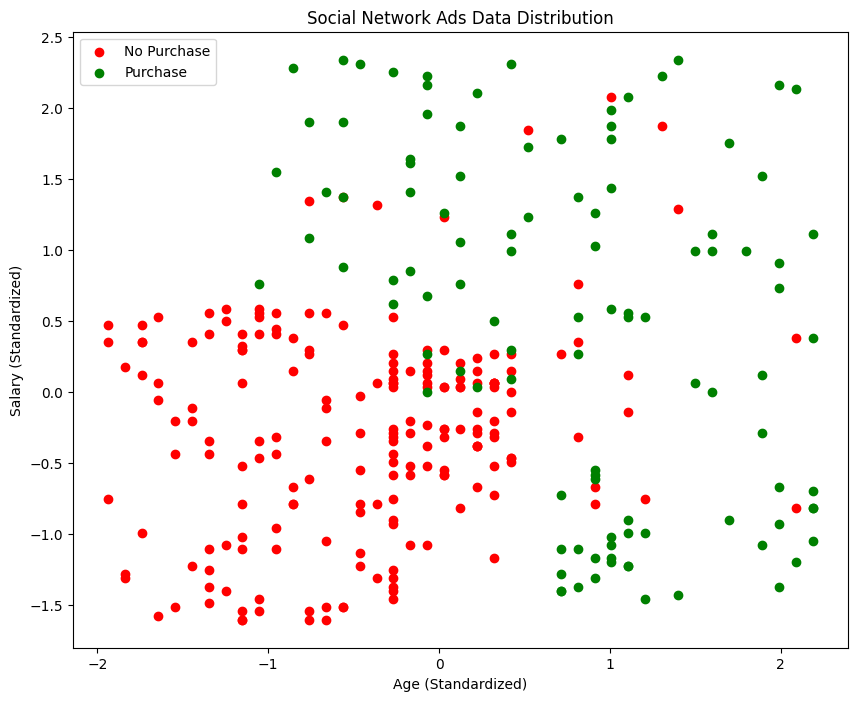

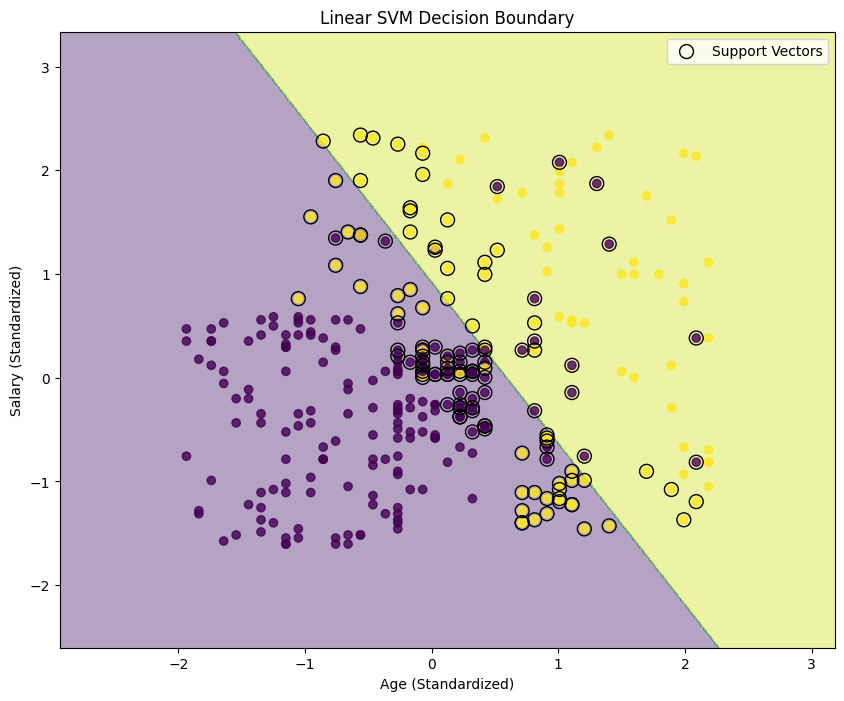

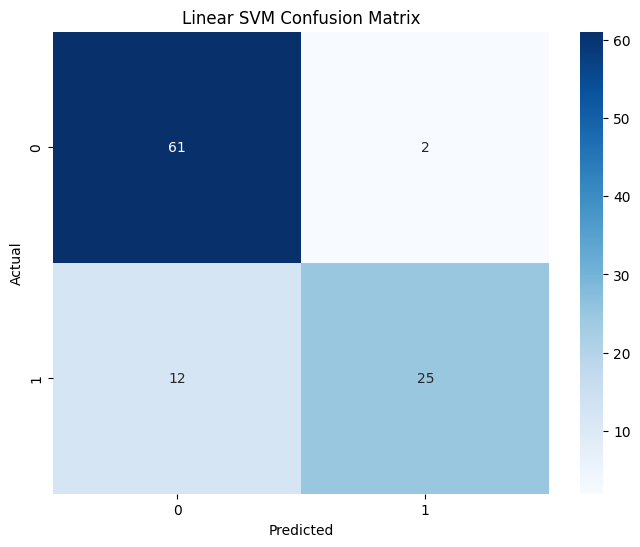

Linear SVM Accuracy: 0.8600


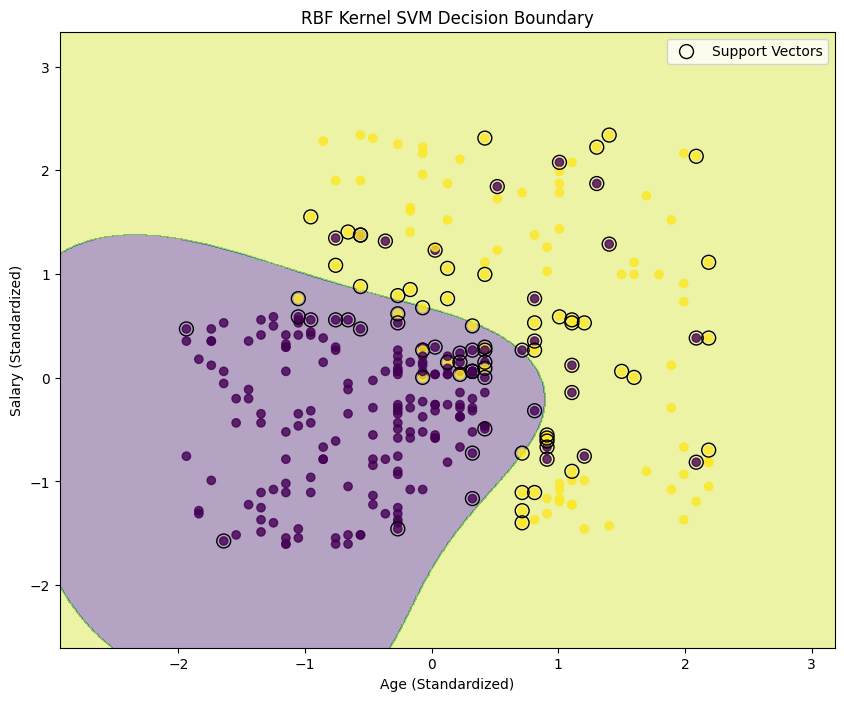

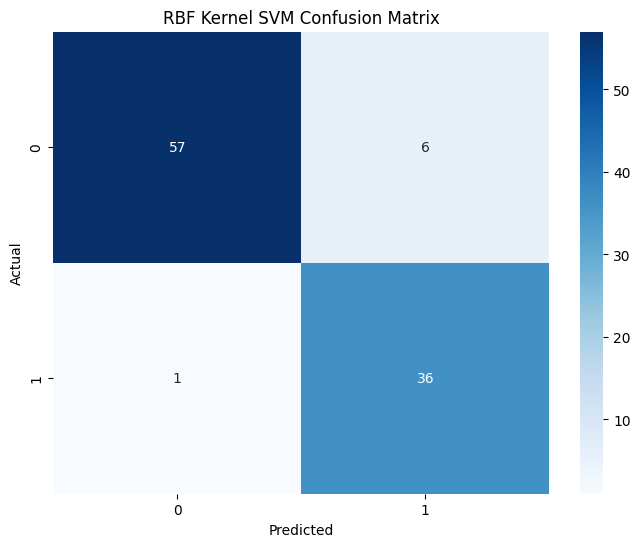

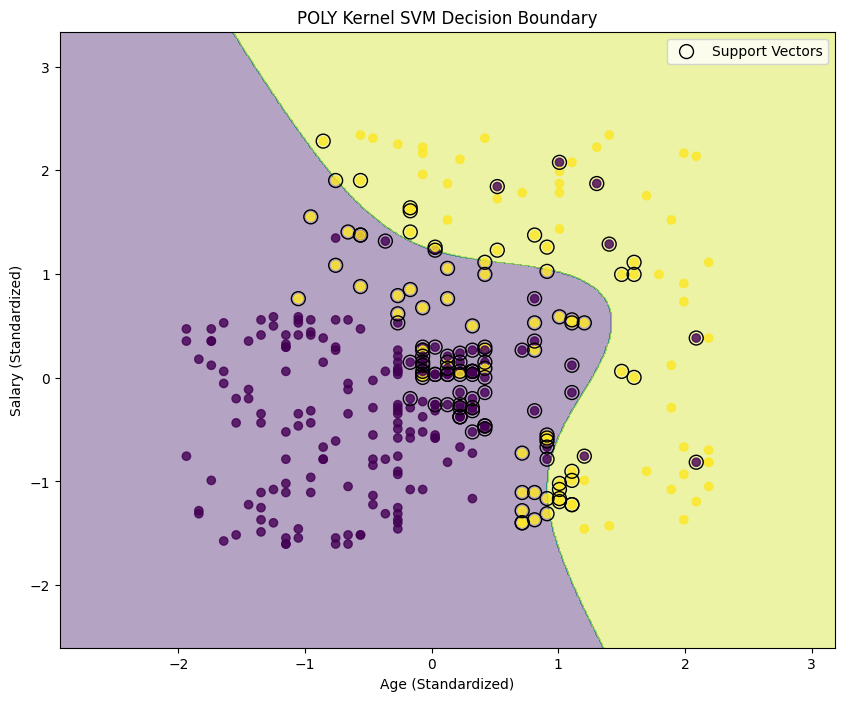

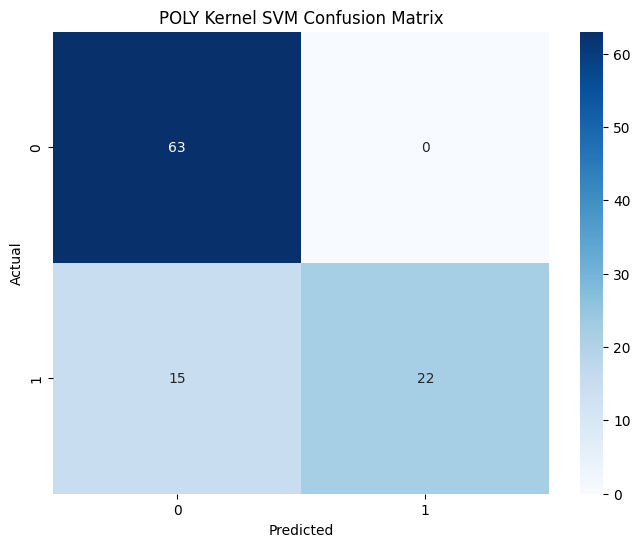

RBF Kernel SVM Accuracy: 0.9300
POLY Kernel SVM Accuracy: 0.8500


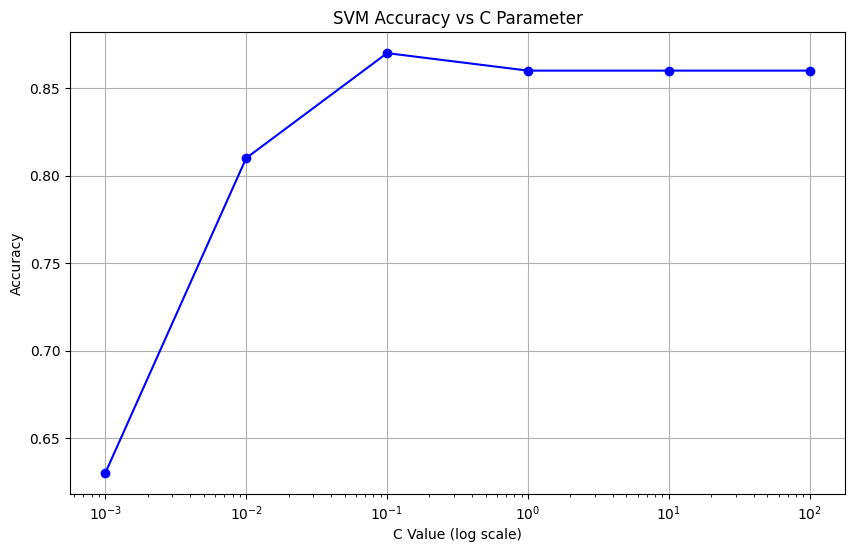


Accuracy for different C values:
C=0.001: 0.6300
C=0.01: 0.8100
C=0.1: 0.8700
C=1: 0.8600
C=10: 0.8600
C=100: 0.8600


In [ ]:
X_train, X_test, y_train, y_test, scaler = prepare_data()
show_data(X_train, y_train)

svm_linear, linear_acc = linear_svm(X_train, X_test, y_train, y_test)
print(f"Linear SVM Accuracy: {linear_acc:.4f}")

kernel_results = kernel_svm(X_train, X_test, y_train, y_test)
for kernel, acc in kernel_results.items():
    print(f"{kernel.upper()} Kernel SVM Accuracy: {acc:.4f}")

c_results = analyze_C_param(X_train, X_test, y_train, y_test)
print("\nAccuracy for different C values:")

for c, acc in c_results.items():
    print(f"C={c}: {acc:.4f}")
